# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

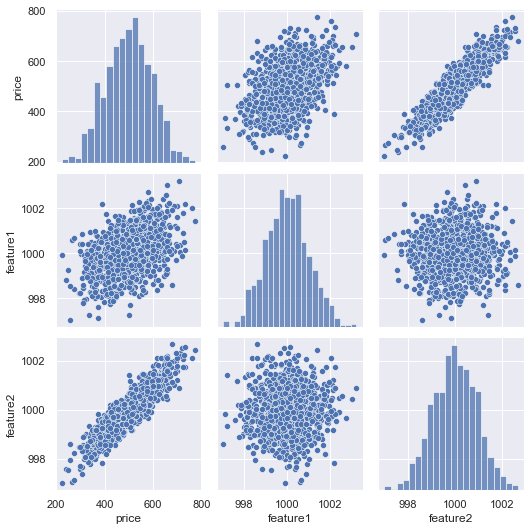

In [5]:
sns.pairplot(df)

Feature 2 has a strong correlation with the Price.

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas series/dataframes to Numpy arrays for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# help(MinMaxScaler)

In [14]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our
# scaler to the training set

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.min(), X_train.max())

0.0 1.0


# TensorFlow 2.0 Syntax

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [ ]:
model = Sequential([
    Dense(units = 2), # Regular densely-connected Neural Network layer:
    Dense(units = 2), # Normal feed-forward, every neuron is connected
    Dense(units = 2)  # to every other neuron in the next layer.
])

### Model - adding in layers one by one

In [ ]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [22]:
# Preferred method:

model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

# Final output node for prediction
model.add(Dense(1))

# For a mean squared error regression problem
model.compile(optimizer = 'rmsprop', loss = 'mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* **Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset"**, used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [23]:
model.fit(X_train, y_train, epochs = 250) # 250 iters on data set

Epoch 1/250
22/22 [==============================] - 0s 689us/step - loss: 252816.1549
Epoch 2/250
22/22 [==============================] - 0s 771us/step - loss: 254519.2086
Epoch 3/250
22/22 [==============================] - 0s 918us/step - loss: 250979.4681
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256654.5781
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 254997.8967
Epoch 6/250
22/22 [==============================] - 0s 875us/step - loss: 254606.5625
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 262822.7894
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 258539.3682
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255491.4158
Epoch 10/250
22/22 [==============================] - 0s 851us/step - loss: 257817.0700
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 249231.0537
Epoch 12/250
22/22 [==============================] -

22/22 [==============================] - 0s 681us/step - loss: 14723.3925
Epoch 95/250
22/22 [==============================] - 0s 692us/step - loss: 10564.5503
Epoch 96/250
22/22 [==============================] - 0s 617us/step - loss: 8741.4112
Epoch 97/250
22/22 [==============================] - 0s 675us/step - loss: 6413.1613
Epoch 98/250
22/22 [==============================] - 0s 663us/step - loss: 5135.9722
Epoch 99/250
22/22 [==============================] - 0s 648us/step - loss: 3638.9107
Epoch 100/250
22/22 [==============================] - 0s 685us/step - loss: 2568.8189
Epoch 101/250
22/22 [==============================] - 0s 706us/step - loss: 2272.4696
Epoch 102/250
22/22 [==============================] - 0s 660us/step - loss: 1918.3226
Epoch 103/250
22/22 [==============================] - 0s 667us/step - loss: 1875.3406
Epoch 104/250
22/22 [==============================] - 0s 703us/step - loss: 1863.2640
Epoch 105/250
22/22 [==============================] - 0s 64

Epoch 189/250
22/22 [==============================] - 0s 567us/step - loss: 120.3069
Epoch 190/250
22/22 [==============================] - 0s 663us/step - loss: 104.0118
Epoch 191/250
22/22 [==============================] - 0s 603us/step - loss: 105.1398
Epoch 192/250
22/22 [==============================] - 0s 737us/step - loss: 98.3957
Epoch 193/250
22/22 [==============================] - 0s 603us/step - loss: 85.6233
Epoch 194/250
22/22 [==============================] - 0s 619us/step - loss: 83.3006
Epoch 195/250
22/22 [==============================] - 0s 707us/step - loss: 79.1539
Epoch 196/250
22/22 [==============================] - 0s 643us/step - loss: 71.7513
Epoch 197/250
22/22 [==============================] - 0s 637us/step - loss: 63.3868
Epoch 198/250
22/22 [==============================] - 0s 643us/step - loss: 63.1980
Epoch 199/250
22/22 [==============================] - 0s 750us/step - loss: 57.4782
Epoch 200/250
22/22 [==============================] - 0s 604u

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df.index.name = 'Epoch'
loss_df.head()

,loss
Epoch,
0,256695.765625
1,256561.234375
2,256422.515625
3,256285.640625
4,256142.828125


Text(0, 0.5, 'Mean Squared Error')

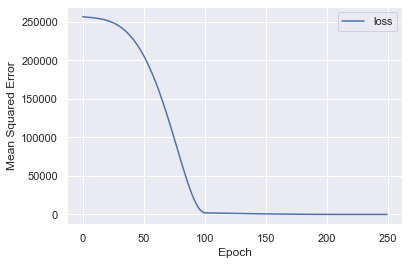

In [25]:
loss_df.plot()
plt.ylabel('Mean Squared Error')

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [26]:
model.metrics_names

['loss']

In [27]:
training_score = model.evaluate(X_train, y_train, verbose = 0)
test_score = model.evaluate(X_test, y_test, verbose = 0)

In [28]:
training_score

24.583955764770508

In [29]:
test_score

26.818851470947266

### Further Evaluations

In [30]:
test_predictions = model.predict(X_test)

In [31]:
test_predictions

array([[406.33423],
       [625.03406],
       [593.5585 ],
       [573.62164],
       [367.59445],
       [580.5842 ],
       [516.33606],
       [460.25812],
       [550.593  ],
       [448.6454 ],
       [613.25574],
       [550.2736 ],
       [420.17398],
       [409.9248 ],
       [652.7799 ],
       [438.4063 ],
       [509.6989 ],
       [661.51227],
       [664.1633 ],
       [566.90735],
       [335.1325 ],
       [445.96088],
       [383.52914],
       [379.74442],
       [567.97327],
       [612.06696],
       [533.69946],
       [428.95032],
       [657.0123 ],
       [415.13928],
       [443.75296],
       [486.33728],
       [439.52652],
       [683.4691 ],
       [425.8343 ],
       [418.76205],
       [503.15765],
       [551.8185 ],
       [511.0036 ],
       [396.39383],
       [620.07294],
       [417.69278],
       [605.90247],
       [447.07953],
       [503.23355],
       [583.1104 ],
       [670.5792 ],
       [491.61813],
       [319.43924],
       [486.6386 ],


In [32]:
pred_df = pd.DataFrame(y_test, columns = ['Test Y'])

In [33]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [34]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [35]:
test_predictions

0      406.334229
1      625.034058
2      593.558472
3      573.621643
4      367.594452
          ...    
295    530.350403
296    516.624023
297    611.115906
298    418.017517
299    411.936829
Length: 300, dtype: float32

In [36]:
pred_df = pd.concat([pred_df, test_predictions], axis = 1)

In [37]:
pred_df.columns = ['Test Y','Model Predictions']

In [38]:
pred_df

,Test Y,Model Predictions
0,402.296319,406.334229
1,624.156198,625.034058
2,582.455066,593.558472
3,578.588606,573.621643
4,371.224104,367.594452
...,...,...
295,525.704657,530.350403
296,502.909473,516.624023
297,612.727910,611.115906
298,417.569725,418.017517


Let's compare to the real test labels!

<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

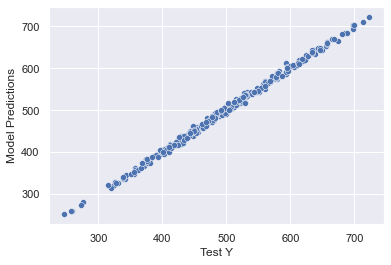

In [39]:
sns.scatterplot(x = 'Test Y', y = 'Model Predictions', data = pred_df)

In [40]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

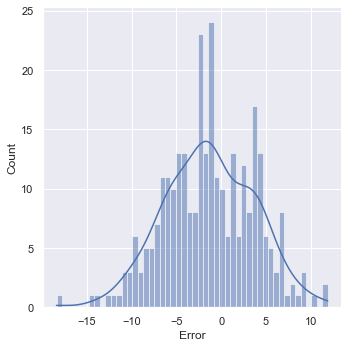

In [41]:
sns.displot(pred_df['Error'], bins = 50, kde = True)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
mean_absolute_error(pred_df['Test Y'], pred_df['Model Predictions'])

4.200539347939371

In [44]:
mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions'])

26.818854906986466

In [45]:
# Essentially the same thing, difference just due to precision
test_score

26.818851470947266

In [46]:
#RMSE
test_score ** 0.5

5.178692061799704

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [47]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [48]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [49]:
new_gem = scaler.transform(new_gem)

In [50]:
model.predict(new_gem)

array([[420.77292]], dtype=float32)

## Saving and Loading a Model

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [53]:
later_model = load_model('my_model.h5')

In [54]:
later_model.predict(new_gem)

array([[420.77292]], dtype=float32)